# Project 2: My project on Wrangling and Analyze Data

## Table of Contents
<ul>
<li><a href="#Data Gathering">Data Gathering</a></li>
<li><a href="#Assessing Data">Assessing Data</a></li>
<li><a href="#Cleaning Data">Cleaning Data</a></li>
<li><a href="#Storing Data">Storing Data</a></li>
<li><a href="#Analyzing and Visualizing Data">Analyzing and Visualizing Data</a></li>    
</ul>

found because you clicked "click here" <a id='find here'></a>

 <a href="#find here">click here</a>

<a id='Data Gathering'></a>
## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import json
%matplotlib inline

In [2]:
#Reading the csv file of the twitter-archive-enhanced file into the notebook
#and loading the first three rows
tw_arc_df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the  `image prediction`(image_predictions.tsv)

In [3]:
#loading and reading the 'image-predictions.tsv file'
img_pred_df = pd.read_csv('image-predictions.tsv', sep ='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
#importing the json module, using a 'with' statement to open the file
#and reading it into a dataframe  
tweet_df = []
with open('tweet-json.txt') as twt:
    A = twt.readlines()
    for line in A:
        tweets = json.loads(line)
        tweet_df.append(tweets)
        
tj_df = pd.DataFrame(tweet_df)

<a id='Assessing Data'></a>
## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



>  Assess data visually and programmatically using pandas
 • Distinguish between dirty data (content or “quality” issues)
 and messy data (structural or “tidiness” issues)
 • Identify data quality issues and categorize them using metrics:
 validity, accuracy, completeness, consistency, and uniformity

### 1. Twitter-archived-enhanced file

In [5]:
#displaying the Twitter-archived-enhanced file dataframe
tw_arc_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


#### Visual Assessment
1. Visual observation shows some the `lang` column should represent language and the records under the `lang` column are in short forms for instance the first two record shows `en` which is a short form of 'english'.

2. Visually observing, the `in_reply_to_status_id` column, there are some visible empty records as NaN.

3. The `create_at` column has an incoveniently long entry for date datatype

4. The `name` column has some data points as `'a'` which is not a name for a dog.

4. The `name` column has data point as `none`, which is not a name for a dog

5. The `source` column has its data contents written in html encoded url

6. The last four columns of the dataset stands for the type of dog but can be put into one column since an individual dog cannot be said to be of two types


#### Programatic assessment
Below, some codes will be use to deeply assess the dataframe beyond visual ability.

In [6]:
 #getting a general info on the dataframe
tw_arc_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
tw_arc_df.timestamp.dtype

dtype('O')

> `Timestamp`<a id= 'timestamp'></a> is object and not date datatype and cleaned <a href="#ish3">here</a>

In [8]:
#assessing for duplicate values
tw_arc_df.duplicated().sum()

0

In [9]:
tw_arc_df.expanded_urls.duplicated().sum()

137

In [10]:
tw_arc_df.tweet_id.duplicated().sum()

0

In [11]:
#assessing the shape of the dataframe and using it to comapre missing records
tw_arc_df.shape

(2356, 17)

In [12]:
#assessing number of missing records
tw_arc_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

<a id= "archmiss"></a>
> The following columns have over `2000+` empty records out of the `2000+` available records.
- `in_reply_to_status_id`
- `in_reply_to_user_id`
- `retweeted_status_id`
- `retweeted_status_user_id `
- `retweeted_status_timestamp`

> This is cleaned <a href="#ish3"> in Issue #2</a>
 

In [13]:
#assessing the descriptive statistics
tw_arc_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


<a id='lessthan10'></a>
> The `rating_numerator` has the maximum value as `1776`; a potential outlier because the 75 percentile is just 12. This is cleaned here

> The `rating_numerator` has the minimun value of `0`; a value below the `rating_denominator`. This is cleaned here

> The `rating_denominator` has a maximum value of `170` and minimum of `0`; meanwhile it should always be `10`. This shows that the records contain values not equal to `10`. This is cleaned <a href="#ish6">here</a>

###### To demostrate this using plot

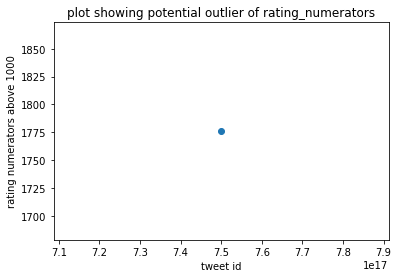

In [14]:
#using plot to clearly demostrate this, a plot of rating_numnerator greater than 200
df1 = tw_arc_df.query('rating_numerator >1000')
x = np.array(df1.tweet_id)
y = np.array(df1.rating_numerator)
plt.scatter(x, y)
plt.title('plot showing potential outlier of rating_numerators')
plt.xlabel('tweet id')
plt.ylabel('rating numerators above 1000');

The total number of rating denominator not equal to ten is 23 and presented below in a plot


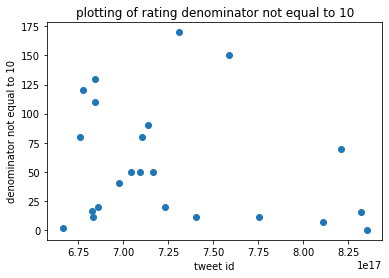

In [15]:
#using plot to clearly demostrate further, Rating_denomiator not equal to 10
tw_arc_df2 = tw_arc_df.query('rating_denominator !=10')
a = np.array(tw_arc_df2.tweet_id)
b = np.array(tw_arc_df2.rating_denominator)
plt.scatter(a, b)
plt.xlabel('tweet id')
plt.ylabel('denominator not equal to 10')
plt.title('plotting of rating denominator not equal to 10')
count1 = str(tw_arc_df2.rating_denominator.count())
print('The total number of rating denominator not equal to ten is' , count1 , 'and presented below in a plot')

>The total number of rating denominator not equal to ten is 23 as presented in the plot. This is cleaned <a href="#ish6">here</a>

In [16]:
#programatical examination of the last four columns
tw_arc_df.columns[-4:]

Index(['doggo', 'floofer', 'pupper', 'puppo'], dtype='object')

In [17]:
#using the sample function to examine the last four columns
tw_arc_df.loc[:, 'doggo': 'puppo'].sample(10)

,doggo,floofer,pupper,puppo
1750,None,None,None,None
1304,None,None,pupper,None
1148,None,None,None,None
607,None,None,None,None
1634,None,None,None,None
510,None,None,None,None
1859,None,None,None,None
1272,None,None,None,None
163,None,None,None,None
415,None,None,None,None


>The last four columns of the dataset stands for the type of dog but can be put into one column since an individual dog cannot be said to be of two types


In [18]:
#exploring the name column
tw_arc_df.name.unique

<bound method Series.unique of 0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           a
2353           a
2354           a
2355        None
Name: name, Length: 2356, dtype: object>

In [19]:
#potential non-dog names include those starting with small letters, and None entry
non_names = []
for r in tw_arc_df.name :
    if r not in non_names and r[0].islower() or r == 'None':
        non_names.append(r)
non_names.sort(reverse = True)
non_names

['very',
 'unacceptable',
 'this',
 'the',
 'such',
 'space',
 'quite',
 'one',
 'old',
 'officially',
 'not',
 'my',
 'mad',
 'light',
 'life',
 'just',
 'infuriating',
 'incredibly',
 'his',
 'getting',
 'by',
 'an',
 'all',
 'actually',
 'a',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None'

In [20]:
print(r)

None


> The name column has non-dog names as `none`, `life`, `a`, `official`  etc as dog-names

### 2. Image-prediction file

In [21]:
#diplaying the Image-prediction file in a dataframe
img_pred_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


#### Visual Assessment
1. The last row has the name `orange` as the first prediction which is not the name of a dog.



#### Programmatic assessment
Below, some codes will be use to deeply assess the dataframe beyond visual ability.

In [22]:
#generating the general statistics of the dataset
img_pred_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
# since the max and the 75-percentile of the img_num columns are 4 and 1 respectively
#assessing the img_number column in order to understand it,
img_pred_df.img_num.unique(),img_pred_df.img_num.value_counts()

(array([1, 4, 2, 3], dtype=int64),
 1    1780
 2     198
 3      66
 4      31
 Name: img_num, dtype: int64)

In [24]:
#assessing the shape of dataframe
img_pred_df.shape

(2075, 12)

*How many rows are in each files?:*


In [25]:
#finding how many rows are in each dataframe
print(tw_arc_df.shape[0], 'rows in twitter-archived-enhanced file' )
print(tj_df.shape[0],'rows in tweet-json file')
print(img_pred_df.shape[0],'rows in image-prediction file')

2356 rows in twitter-archived-enhanced file
2354 rows in tweet-json file
2075 rows in image-prediction file


> All three tables don't have the same number of rows by comparison and the `image-prediction file`  has the least

In [26]:
#inspecting for empty records
img_pred_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [27]:
#assessing for duplicate values
img_pred_df.duplicated().sum()

0

In [28]:
img_pred_df.tweet_id.duplicated().sum()

0

In [29]:
img_pred_df.jpg_url.duplicated().sum()


66

In [30]:
#assessing general information on the dataset
img_pred_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [31]:
#since visual assessment showed that p1 has a non-dog name, this is further checked progammatically 
#img_pred_df.p1[2074]
img_pred_df.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

> Majority of non-dog names on the `p1` column may have  value counts of `'1'`. Now, the suspected non-dog names with value count of `'1'` will be properly examined

In [32]:
#other p1 may also contain a non-dog name and just one value count
non_dog = img_pred_df.p1.value_counts()
non_dog = pd.DataFrame(non_dog)
non_dog = non_dog.query('p1==1')

In [33]:
#other possible non-dog names can be shown by sample module from the `xe` data frame
non_dog.query('p1==1').sample(20)

,p1
water_buffalo,1
convertible,1
stove,1
bison,1
maze,1
cuirass,1
bookshop,1
clumber,1
china_cabinet,1
American_black_bear,1


> `p1` column(1st prediction) has other non-dog names like `pillow`, `bald_eagle`, `binoculars`, `sulphur-crested_cockatoo`, `coil` `carousel` etc as shown in the dataframe `non_dog` above and they are `175` in number

### 3. Tweet-json file

In [34]:
#showing the Tweet-json file in a dataframe
tj_df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,False,False,en,NaN,NaN,NaN,NaN
2350,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,False,False,en,NaN,NaN,NaN,NaN
2351,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,False,False,en,NaN,NaN,NaN,NaN
2352,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,False,False,en,NaN,NaN,NaN,NaN


#### Visual Assessment
1. Visual observation shows some the `lang` column should represent language and the records under the `'lang'` column are in short forms for instance the first two record shows 'en' which is a short form of 'english'.

2. In addition, the `'entities'` column has a box-like character in the records.

3. Visually observing, the `'in_reply_to_status_id'` column, there are some visible empty records as `NaN`.

4. The `'create_at'` column has an incoveniently long entry for date datatype

5. The `'extended_entities'` column has data entry enclosed in `'{}' `

6. The `tweet id` is named `id` 


#### Programatic assessment
Below, some codes will be use to deeply assess the dataframe beyond visual ability.

In [35]:
# assessing the shape in order to compare it with the number of empty set
tj_df.shape

(2354, 31)

In [36]:
#viewing the general statistics
tj_df.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,quoted_status_id
count,2.354000e+03,7.800000e+01,7.800000e+01,2354.000000,2354.000000,2.900000e+01
mean,7.426978e+17,7.455079e+17,2.014171e+16,3164.797366,8080.968564,8.162686e+17
std,6.852812e+16,7.582492e+16,1.252797e+17,5284.770364,11814.771334,6.164161e+16
min,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,0.000000,6.721083e+17
25%,6.783975e+17,6.757419e+17,3.086374e+08,624.500000,1415.000000,7.888183e+17
50%,7.194596e+17,7.038708e+17,4.196984e+09,1473.500000,3603.500000,8.340867e+17
75%,7.993058e+17,8.257804e+17,4.196984e+09,3652.000000,10122.250000,8.664587e+17
max,8.924206e+17,8.862664e+17,8.405479e+17,79515.000000,132810.000000,8.860534e+17


In [37]:
#assessing the number of empty records
tj_df.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

In [38]:
#checking for number of null values from some selected columns from the list
tj_df.retweeted_status.isnull().count(), tj_df.quoted_status_id.isnull().count(), tj_df.quoted_status.isnull().count()

(2354, 2354, 2354)

> The following columns has more than 2000+  **null values** <a id='missing value'></a> out of the 2000+ rows in tweet-json file:
- `in_reply_to_user_id`
- `in_reply_to_user_id_str`
- `in_reply_to_screen_name`
- `geo`
- `coordinates`
- `contributors`
- `quoted_status_id`
- `retweeted_status`
- `quoted_status_id_str`
- `quoted_status`
> The issue was cleaned <a href="#ish1">here</a>

In [39]:
#assessing the general information of the dataframe
tj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [40]:
#the created_at column has object datatype
tj_df.created_at.dtype

dtype('O')

>The `created_at` <a id='created_at'></a> column has an object datatype and not datetime and cleaned <a href="#ish2">here</a>

In [41]:
#taking the distinct datapoints under the 'lang' column and count of each
tj_df.lang.unique(), tj_df.lang.value_counts()

(array(['en', 'und', 'in', 'eu', 'es', 'nl', 'tl', 'ro', 'et'],
       dtype=object),
 en     2336
 und       7
 in        3
 nl        3
 eu        1
 es        1
 tl        1
 ro        1
 et        1
 Name: lang, dtype: int64)

>The `language` column of the `tweet_json` dataframe is named `lang` 

> The `language` column of the `tweet_json` dataframe also has its entries in short forms for instance; `en`  `und`   `in`  `nl` `eu` `es` `tl`  `ro `   ` et` to represent `English` etc

# --------------------------------------------------------------------------------------------------------------
# --------------------------------------------------------------------------------------------------------------

## Quality issues
#### Completeness
1. The following columns have more than 2000+ null values out of the 2000+ rows in `tweet-json file`:
- `in_reply_to_user_id` 
- `in_reply_to_user_id_str`
- `in_reply_to_screen_name`
- `geo`
- `coordinates`
- `contributors`
- `quoted_status_id`
- `retweeted_status`
- `quoted_status_id_str`
- `quoted_status`

**(<a href="#ish1">cleaned here</a>)**

2.  The following columns have over `2000+` empty records out of the `2000+` available records in the `twitter-archived-enhanced file`:
- `in_reply_to_status_id`
- `in_reply_to_user_id`
- `retweeted_status_id`
- `retweeted_status_user_id `
- `retweeted_status_timestamp`

**(<a href="#ish2">cleaned here</a>)**



#### Validity
3. The `'created_at'` column of the `'tweet-json'` file is in the object datatype which is not appropriate for analysis. **(<a href="#ish3"> cleaned here</a>)**
4. `Timestamp` of the twitter-archive-enhanced has the object-type datatype **(<a href="#ish4"> cleaned here</a>)**

#### Accuracy
5. Records in the `twitter-archived-enhanced file` that has `'rating_numerator'` less than `10` as well as potential outliers like rating_numerator over `1000` **(<a href="#ish5"> cleaned here</a>)**
6. Records in the `twitter-archived-enhanced file`  has `'rating_denominator'` not equal to `10` **(<a href="#ish6"> cleaned here</a>)**

#### Consistency
7. The `source` column contains data pionts in a manner that makes it difficult to understand beccause the `html` tags, url format etc **(<a href="#ish7"> cleaned here</a>)**
8. The name column has non-dog names as `none`, `life`, `a`, `official` etc as part of the  dog names **(<a href="#ish8"> cleaned here</a>)**

### Tidiness issues
9. the `language` column of the `tweet_json` dataframe is named `lang`  **(<a href="#ish9"> cleaned here</a>)**

10. the `language` column of the `tweet_json` dataframe also has its entries in short forms for instance; `en`  `und`   `in`  `nl` `eu` `es` `tl`  `ro `   ` et` to represent `English` etc  **(<a href="#ish10"> cleaned here</a>)**
11. The last four columns of the `twitter-archived` dataset stand for the types of dog but can be put into one column since an individual dog cannot be said to be of two types  **(<a href="#ish11"> cleaned here</a>)**
12. The 'tweet id' in the `tweet-json` file is named `id` **(<a href="#ish12"> cleaned here</a>)**

<a id='Cleaning Data'></a>
## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [42]:
# Make copies of original pieces of data
cleaned_arch_df = tw_arc_df.copy()
cleaned_tjson_df = tj_df.copy()
cleaned_img_df = img_pred_df.copy()

### Issue #1 <a id='ish1'></a>: 
The following columns has more than 2000+ null values out of the 2000+ rows in tweet-json file in `tweet-json file`:
- `in_reply_to_user_id`
- `in_reply_to_user_id_str`
- `in_reply_to_screen_name`
- `geo`
- `coordinates`
- `contributors`
- `quoted_status_id`
- `retweeted_status`
- `quoted_status_id_str`
- `quoted_status`
- `place`
- `in_reply_to_status_id_str`
- `in_reply_to_status_id`
( Find where  <a href="#missing value">**null values**</a> issue was assesed)

#### Define:
- With over 2000+ null values, these rows contain insufficient amount of data that can neither be usefull for deriving insight nor building machine learning models.
- Locate the selected columns and programatically drop them.


#### Code

In [43]:
#showing the null values
cleaned_tjson_df.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

In [44]:
#dropping the columns with 2000+ null values
cleaned_tjson_df.drop(['in_reply_to_user_id',
                       'in_reply_to_user_id_str',
                       'in_reply_to_screen_name',
                       'in_reply_to_status_id',
                       'in_reply_to_status_id_str',
                       'place',
                       'geo',
                       'coordinates',
                       'contributors',
                       'quoted_status_id',
                       'retweeted_status',
                       'quoted_status_id_str',
                       'quoted_status'], axis = 1, inplace=True)

#### Test

In [45]:
#checking if the 2000+ null datapoint and columns has been removeds
cleaned_tjson_df.isnull().sum()

created_at                         0
id                                 0
id_str                             0
full_text                          0
truncated                          0
display_text_range                 0
entities                           0
extended_entities                281
source                             0
user                               0
is_quote_status                    0
retweet_count                      0
favorite_count                     0
favorited                          0
retweeted                          0
possibly_sensitive               143
possibly_sensitive_appealable    143
lang                               0
dtype: int64

### Issue #2: <a id='ish2'></a>

The following columns have over `2000+` empty records out of the `2000+` available records in the `twitter-archived-enhanced file`:
- `in_reply_to_status_id`
- `in_reply_to_user_id`
- `retweeted_status_id`
- `retweeted_status_user_id `
- `retweeted_status_timestamp`

- Data was assessed <a href="#archmiss">here</a>

#### Define:
- With over 2000+ null values, these rows contain insufficient amount of data that can neither be usefull for deriving insight nor building machine learning models.
- Locate the selected columns and programatically drop them.

#### Code

In [46]:
#showing null points once more
cleaned_arch_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [47]:
#dropping the columns with 2000+ null values
cleaned_arch_df.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis = 1, inplace=True)

#### Test

In [48]:
#showing null points once more
cleaned_arch_df.isnull().sum()

tweet_id               0
timestamp              0
source                 0
text                   0
expanded_urls         59
rating_numerator       0
rating_denominator     0
name                   0
doggo                  0
floofer                0
pupper                 0
puppo                  0
dtype: int64

### Issue #3<a id='ish3'></a>: 
 The `'created_at'` column of the `'tweet-json'` file is in the object datatype which is not appropriate for analysis.
 - <a href="#created_at">Here</a>, the issue was assessed

#### Define
- The `created_at` column is necessary for analysis over time
- It is in object type which make it unfit for a timeline analysis
- change the column type to datetime datatype


#### Code

In [49]:
#converting to datetime data type
cleaned_tjson_df.created_at = pd.to_datetime(cleaned_tjson_df.created_at)

#### Test

In [50]:
#taking two samples and confirming the datatyes
cleaned_tjson_df.created_at.sample(2)

1579   2016-01-13 04:10:18+00:00
2289   2015-11-19 02:20:46+00:00
Name: created_at, dtype: datetime64[ns, UTC]

### Issue #4 <a id='ish4'></a> : 
`Time-stamp` of the `twitter-archive-enhanced` has the object-type datatype
- click <a href="#timestamp">here</a> to see where the issue was assessed.


#### Define
- The `timestamp` column is necessary for analysis over time
- change the column type to datetime datatype


#### Code

In [149]:
#Converting the timestampt to datatime datatype
cleaned_arch_df.timestamp = pd.to_datetime(cleaned_arch_df.timestamp, format='%Y%m%d', errors='ignore')

#### Test

In [158]:
#checking for effected changes on five samples
cleaned_arch_df.timestamp.sample(5)

9      2017-07-26 15:59:51+00:00
1894   2015-12-10 00:10:43+00:00
1171   2016-04-14 00:55:25+00:00
1522   2016-01-22 21:39:24+00:00
2027   2015-12-02 02:13:48+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

### Issue #5: <a id='ish5'></a>

Records in the `twitter-archived-enhanced file` that has `'rating_numerator'` less than `10` as well as potential outliers like rating_numerator over `1000`

#### Define:
- create a user-defined function that will:

- Find the 75-percentile and 25-percentile

- Calculate the inter quatile range

- calculate the limits of upper boundary and lower boundary of the rating denominator

- Spot the outliers

- remove outliers

#### Code

In [53]:
#creating a fuction to find the the quatiles,mean,and limits
def limit_finder(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    inter_quautile_range = IQR = Q3-Q1
    lower_limit_boundary = llb = Q1 - (IQR*1.5)
    upper_limit_boundary = ulb = Q3 + (IQR*1.5)
    print('this is lower boundary :',llb)
    print('this is upper boundary :', ulb)
    print('this is mean :', df.mean())

In [54]:
#using the created function to find limits for rating denominator
limit_finder(cleaned_arch_df.rating_numerator)

this is lower boundary : 7.0
this is upper boundary : 15.0
this is mean : 13.12648556876061


In [55]:
#selecting the potential outliers
cleaned_arch_df.query('rating_numerator > 15 |rating_numerator < 7 ')


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
55,881633300179243008,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,17,10,None,None,None,None,None
188,855862651834028034,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,420,10,None,None,None,None,None
189,855860136149123072,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,666,10,None,None,None,None,None
229,848212111729840128,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2338,666104133288665088,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
2342,666082916733198337,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2349,666051853826850816,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [56]:
#checking the rating numerators outliers distinct counts
cleaned_arch_df.query('rating_numerator >15').rating_numerator.count(),cleaned_arch_df.query('rating_numerator <7').rating_numerator.count()

(26, 125)

In [57]:
#Since rating numerators above 10 is a  unique system of rating by WeRateDogs, values above the rating denominator.
#however, for good wrangling practice sake, rating numerators that are outrageously higher than the rating denominator will be cleaned.
#cleaning rating numberators less than 7
cleaned_arch_df = cleaned_arch_df.query('rating_numerator > 7')

In [58]:
#cleaning rating numberators greater than 500 
cleaned_arch_df = cleaned_arch_df.query('rating_numerator <500')

#### Test

In [59]:
#checking the rating numerators less than 7
cleaned_arch_df.query('rating_numerator < 7 ')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [60]:
#checking the rating numerators greater than 500
cleaned_arch_df.query('rating_numerator > 500')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [61]:
#checking for rating numberator range
cleaned_arch_df.rating_numerator.min(),cleaned_arch_df.rating_numerator.max()

(8, 420)

### Issue #6: <a id='ish6'></a>

Records in the `twitter-archived-enhanced file`  has `'rating_denominator'` not equal to `10`
- click <a href="#lessthan10">here</a> to see how it was assessed


#### Define
- It is known that the rating denominator is supposed to be 10
- use the already created function to :
- Find the 75-percentile and 25-percentile
- Calculate the inter quatile range
- calculate the limits of upper boundary and lower boundary of the rating denominator
- Spot the outliers
- remove outliers

#### Code

In [62]:
#using the user defined function created earlier to find the limits for the denomiators
limit_finder(cleaned_arch_df.rating_denominator)

this is lower boundary : 10.0
this is upper boundary : 10.0
this is mean : 10.492406810860562


In [63]:
#selecting rating not equal to 10
cleaned_arch_df.query('rating_denominator != 10')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,11,15,None,None,None,None,None
433,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [64]:
#removing the denoninators not equal to 10 since they are just 23 in numbers and does not affect the dataset much
cleaned_arch_df = cleaned_arch_df.query('rating_denominator == 10')

#### Test

In [65]:
#testing for effected changes
cleaned_arch_df.query('rating_denominator != 10')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #7: <a id='ish7'></a>
- The `source` columns contains data piintis in a manner that makes it difficult to understand beccause the `html` tags, url format etc

### Define
- Print out distinct datapoints under sources column
- store distinct values as org_source in a dictionar
- create function to retrieve keys from the dictionary
- Apply to the source column using this fuctions
- Delete the corresponding source columns on the `json` file.

#### Code

In [66]:
#print out the distinct values of the source column
print(cleaned_arch_df.source.unique())

['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
 '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'
 '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']


In [67]:
#copying and pasting into a python dictionary: org_source

#(Converting this array to python dictionary is an option but 
#this was done because converting the array to dictionary was not appropriate for the fucntion to be executed)

org_source = {'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'Twitter for iPhone',
'<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>' : 'Vine - Make a Scene',
'<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>' :'Twitter Web Client',
'<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':'TweetDeck'}


In [68]:
#checking the type of object org_source is
type(org_source)

dict

In [69]:
# Creating a funtion that will retrieve all the keys from the org_source python dictionary
def get_new_source(cleaned_arch_df):
    if cleaned_arch_df.source in org_source.keys():
        new_source = org_source[cleaned_arch_df.source]
        return new_source
    else:
        return cleaned_arch_df.source
    
cleaned_arch_df.source = cleaned_arch_df.apply(get_new_source, axis=1)

In [70]:
#deleting the source column in the json file
cleaned_tjson_df.drop(['source'], axis =1, inplace = True)

#### Test

In [71]:
#checkincleaned_arch_dffor distinct values again
cleaned_arch_df.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

## Issue #8:  <a id='ish8'></a>
-  The name column has non-dog names as `none`, `life`, `a`, `official` etc as part of the  dog names 

### Define
- filter the non-dog names
- replace with NaN


#### Code

In [72]:
#Highlighting non-dog names as assessed before
non_names

['very',
 'unacceptable',
 'this',
 'the',
 'such',
 'space',
 'quite',
 'one',
 'old',
 'officially',
 'not',
 'my',
 'mad',
 'light',
 'life',
 'just',
 'infuriating',
 'incredibly',
 'his',
 'getting',
 'by',
 'an',
 'all',
 'actually',
 'a',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None'

In [73]:
#Replace all non-dog names with NaN
cleaned_arch_df.replace(non_names,np.nan,  inplace = True)

#### Test

In [74]:
#checking for the distinct values
cleaned_arch_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Bella', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooey',

#### Issue #9: <a id='ish9'></a>

The `language` column of the `tweet_json` dataframe is named `lang` 


#### Define
- Rename the `lang` column to `language`

#### Code

In [75]:
#full list of the columns
cleaned_tjson_df.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'user',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'lang'],
      dtype='object')

In [76]:
#showing the lang column since its last of the columns
cleaned_tjson_df.columns[-1]

'lang'

In [77]:
#renaming of the lang column to language
cleaned_tjson_df.rename(columns = {'lang' : 'language'}, inplace = True)

#### Test

In [78]:
#checking for effected changes
cleaned_tjson_df.columns[-1]

'language'

### Issue #10: <a id='ish10'></a>

The `language` column of the `tweet_json` dataframe also has its entries in short forms for instance; `en`  `und`   `in`  `nl` `eu` `es` `tl`  `ro `   ` et` to represent languages for instance  `en` for `English`

#### Define
- Change the language short form to their full forms which include
- es = spanish
- eu = basque
- et = etonian
- inh = ingush
- en = english
- nl = dutch
- ro = romania
- tl = tagolog

#### Code

In [79]:
#showing the distinct languages in their short forms
cleaned_tjson_df.language.unique()

array(['en', 'und', 'in', 'eu', 'es', 'nl', 'tl', 'ro', 'et'],
      dtype=object)

In [80]:
#programatically replacing the language short forms
cleaned_tjson_df.language.replace({'es' : 'spanish', 
            'eu' : 'basque', 
            'et' : 'etonian',  
            'en' : 'english', 
            'nl' : 'dutch', 
            'ro' : 'romania', 
            'tl' : 'tagolog', 
            'in' : 'ingush' }, inplace = True)

#### Test

In [81]:
#checking for effected changes
cleaned_tjson_df.language.unique()

array(['english', 'und', 'ingush', 'basque', 'spanish', 'dutch',
       'tagolog', 'romania', 'etonian'], dtype=object)

### Issue #11: <a id='ish11'></a>
11. The last four columns of the `twitter-archived` dataset stand for the types of dog but can be put into one column since an individual dog cannot be said to be of two types


#### Define 
- extract from the four dog type columns into a newly created column 
- Drop the four columns.

#### Code

In [82]:
cleaned_arch_df.groupby(['doggo', 'floofer', 'pupper', 'puppo']).size().reset_index().rename(columns={0: 'count'})

,doggo,floofer,pupper,puppo,count


In [83]:
#showing the four columns containing the dog stages 
cleaned_arch_df.loc[:, 'doggo': 'puppo']


,doggo,floofer,pupper,puppo
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
2347,NaN,NaN,NaN,NaN
2348,NaN,NaN,NaN,NaN
2350,NaN,NaN,NaN,NaN
2353,NaN,NaN,NaN,NaN


In [84]:
cleaned_arch_df['dog_stage'] = cleaned_arch_df['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [85]:
#checking for the created column
cleaned_arch_df.dog_stage

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2347    NaN
2348    NaN
2350    NaN
2353    NaN
2355    NaN
Name: dog_stage, Length: 2155, dtype: object

In [86]:
#checking for effected changes  
cleaned_arch_df[['dog_stage','doggo', 'floofer', 'pupper', 'puppo']].sample(10)

,dog_stage,doggo,floofer,pupper,puppo
1558,NaN,NaN,NaN,NaN,NaN
1987,NaN,NaN,NaN,NaN,NaN
1719,NaN,NaN,NaN,NaN,NaN
819,NaN,NaN,NaN,NaN,NaN
818,doggo,doggo,NaN,NaN,NaN
1763,NaN,NaN,NaN,NaN,NaN
796,NaN,NaN,NaN,NaN,NaN
1124,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,NaN,NaN
1479,NaN,NaN,NaN,NaN,NaN


In [87]:
#droping the dog stage column from which the dog stage texts where extracted from.
cleaned_arch_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

#### Test

In [88]:
#Checking the distinct values
cleaned_arch_df.dog_stage.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [89]:
#Checking the distinct values counts to ensure absence of strange counts
cleaned_arch_df.dog_stage.value_counts()

pupper     244
doggo       91
puppo       37
floofer      4
Name: dog_stage, dtype: int64

### Issue #12: <a id='ish12'></a>
- The 'tweet id' in the `tweet-json` file is named `id`

#### Define
- Rename the `id` column of the  `tweet-json` file to `tweet_id` 

#### Code

In [90]:
#renaming the id column to tweet_id
cleaned_tjson_df.rename( columns = {'id' : 'tweet_id'}, inplace = True)

#### Test

In [91]:
#confirming the presence of the tweet_id column
cleaned_tjson_df.tweet_id

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2349    666049248165822465
2350    666044226329800704
2351    666033412701032449
2352    666029285002620928
2353    666020888022790149
Name: tweet_id, Length: 2354, dtype: int64

<a id='Storing Data'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [92]:
#creating a master dataset
#by merging all data set on the common tweet_id column
twitter_archive_master = cleaned_arch_df.merge(cleaned_tjson_df, how = 'inner', on='tweet_id')

twitter_archive_master = twitter_archive_master.merge(cleaned_img_df,how = 'inner', on='tweet_id')

twitter_archive_master

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,created_at,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,2017-08-01 16:23:56+00:00,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,2017-08-01 00:17:27+00:00,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,2017-07-31 00:18:03+00:00,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,2017-07-30 15:58:51+00:00,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,2017-07-29 16:00:24+00:00,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,666057090499244032,2015-11-16 00:55:59 +0000,Twitter for iPhone,My oh my. This is a rare blond Canadian terrie...,https://twitter.com/dog_rates/status/666057090...,9,10,NaN,NaN,2015-11-16 00:55:59+00:00,...,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
1884,666055525042405380,2015-11-16 00:49:46 +0000,Twitter for iPhone,Here is a Siberian heavily armored polar bear ...,https://twitter.com/dog_rates/status/666055525...,10,10,NaN,NaN,2015-11-16 00:49:46+00:00,...,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
1885,666050758794694657,2015-11-16 00:30:50 +0000,Twitter for iPhone,This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,10,10,NaN,NaN,2015-11-16 00:30:50+00:00,...,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
1886,666033412701032449,2015-11-15 23:21:54 +0000,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN,2015-11-15 23:21:54+00:00,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [93]:
#saving to a csv file
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

<a id='Analyzing and Visualizing Data'></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [94]:
#displaying general information of the dataset
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888 entries, 0 to 1887
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       1888 non-null   int64              
 1   timestamp                      1888 non-null   object             
 2   source                         1888 non-null   object             
 3   text                           1888 non-null   object             
 4   expanded_urls                  1888 non-null   object             
 5   rating_numerator               1888 non-null   int64              
 6   rating_denominator             1888 non-null   int64              
 7   name                           1311 non-null   object             
 8   dog_stage                      315 non-null    object             
 9   created_at                     1888 non-null   datetime64[ns, UTC]
 10  id_str                  

In [95]:
#showing first three rows of the dataset
twitter_archive_master.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,created_at,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,2017-08-01 16:23:56+00:00,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [97]:
#obtaining a general statistics of the dataset
twitter_archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1.888000e+03,1888.000000,1888.0,1888.000000,1888.000000,1888.00000,1888.000000,1.888000e+03,1.888000e+03
mean,7.430005e+17,11.345869,10.0,3139.308792,9051.333157,1.21928,0.599385,1.347476e-01,5.999787e-02
std,6.840041e+16,9.643820,0.0,5239.551093,12463.580147,0.58111,0.270950,1.008689e-01,5.087677e-02
min,6.660209e+17,8.000000,10.0,16.000000,0.000000,1.00000,0.044333,1.011300e-08,1.740170e-10
25%,6.785941e+17,10.000000,10.0,666.000000,1859.000000,1.00000,0.367736,5.300115e-02,1.595832e-02
50%,7.220583e+17,11.000000,10.0,1526.500000,4199.500000,1.00000,0.599265,1.190060e-01,4.889640e-02
75%,7.989663e+17,12.000000,10.0,3652.000000,11594.500000,1.00000,0.848561,1.956673e-01,9.226907e-02
max,8.924206e+17,420.000000,10.0,79515.000000,132810.000000,4.00000,1.000000,4.676780e-01,2.710420e-01


In [99]:
#what is the top dog stage
twitter_archive_master.dog_stage.value_counts()

pupper     210
doggo       73
puppo       29
floofer      3
Name: dog_stage, dtype: int64

In [100]:
#dog_stage with highest rating metrics

#creating a new metrics for rating
twitter_archive_master['rating_per_10'] = (twitter_archive_master.rating_numerator / twitter_archive_master.rating_denominator) * 10


#dog stage againg the rating metrics
twitter_archive_master.groupby('dog_stage').mean()['rating_per_10']

dog_stage
doggo      11.753425
floofer    12.666667
pupper     10.985714
puppo      12.137931
Name: rating_per_10, dtype: float64

In [162]:
#analyzing dog stage by number of favorits/likes
twitter_archive_master.groupby(['dog_stage']).sum()['favorite_count']

dog_stage
doggo      1192485
floofer      68787
pupper     1504122
puppo       637250
Name: favorite_count, dtype: int64

In [161]:
#analyzing dog stages by retweets
twitter_archive_master.groupby(['dog_stage']).sum()['retweet_count']

dog_stage
doggo      458569
floofer     25587
pupper     530037
puppo      195256
Name: retweet_count, dtype: int64

In [101]:
#What languages were used for twitting and what are the proportion of the languages in the dataset?
prt = twitter_archive_master.language.value_counts()
totl = twitter_archive_master.language.value_counts().sum()
(prt/totl)*100

english    99.629237
dutch       0.158898
ingush      0.105932
basque      0.052966
etonian     0.052966
Name: language, dtype: float64

In [102]:
#what tweet langugae has the most favorite
twitter_archive_master.groupby('language').sum().favorite_count

language
basque         2892
dutch          3867
english    17025288
etonian         414
ingush        56456
Name: favorite_count, dtype: int64

In [114]:
#what dog post language the most average retweets
twitter_archive_master.groupby(['language']).mean()['retweet_count']

language
basque       622.000000
dutch        367.666667
english     3132.034556
etonian      115.000000
ingush     16909.000000
Name: retweet_count, dtype: float64

In [140]:
#Language with most engagements
#addition of likes and retweets from a post in a languages
data = twitter_archive_master.groupby('language').sum().favorite_count + twitter_archive_master.groupby(['language']).mean()['retweet_count']

#dividing these values by 10^6 to obtain values in millions
data = data/10**6
data

language
basque      0.003514
dutch       0.004235
english    17.028420
etonian     0.000529
ingush      0.073365
dtype: float64

In [105]:
#gettin insight about the source of the twitter posts
part = twitter_archive_master.source.value_counts()
total = twitter_archive_master.source.value_counts().sum()
percentage = (part/total)*100
percentage

Twitter for iPhone    98.146186
Twitter Web Client     1.324153
TweetDeck              0.529661
Name: source, dtype: float64

In [106]:
#how many times did the model predict a dog on the first prediction
(twitter_archive_master.p1_dog.value_counts() / twitter_archive_master.p1_dog.value_counts().sum())*100

True     77.436441
False    22.563559
Name: p1_dog, dtype: float64

### Insights:
1. WeRateDog has most original tweets in english (>90%) and that means they have a good grasp of English audience.

2. Although a good number of retweets were made in by English speakers,a staggering number of retweets were made by Ingush speakers too.

3. The most attractive posts were those tweets made by English Speakers because they had the highest post likes/favorites

4. The pupper dog stage is the most common dog stage that people posted on the twitter page

5. Over 90% of the tweets were posted using an Iphone.

6. Over 70% of the the first predictions were predicted as dogs.

### Visualization

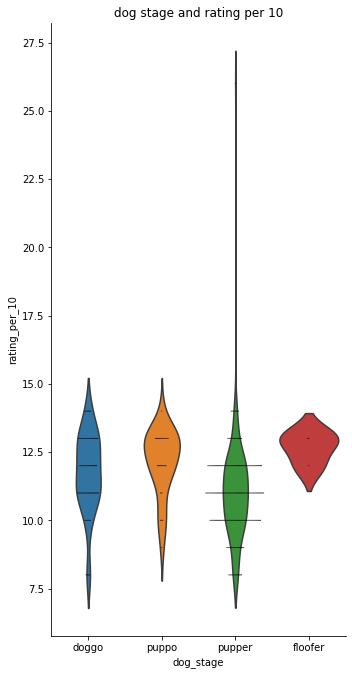

In [107]:
#creating a visualization for how ratings appears for each dog stage 
g = sns.catplot(x="dog_stage", y="rating_per_10", kind="violin", inner=None, data=twitter_archive_master)
g.fig.set_figheight(10)
sns.swarmplot(x="dog_stage", y="rating_per_10", color="k", size=1, data=twitter_archive_master, ax=g.ax);
plt.title('dog stage and rating per 10');

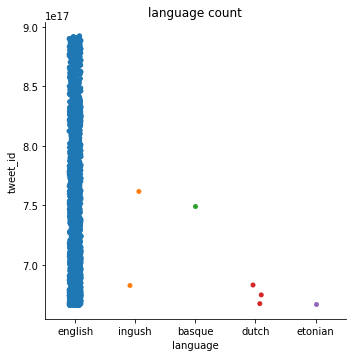

In [126]:
#creating a visualization to demonstrate language count
sns.catplot(x='language', y= 'tweet_id', data= twitter_archive_master)
plt.title('language count');


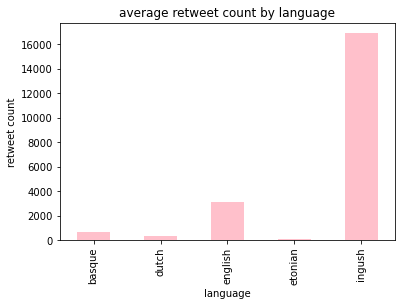

In [139]:
#visualizing the mean retweet count by language
twitter_archive_master.groupby(['language']).mean()['retweet_count'].plot(kind='bar',color='pink')
plt.ylabel('retweet count')
plt.title('average retweet count by language');

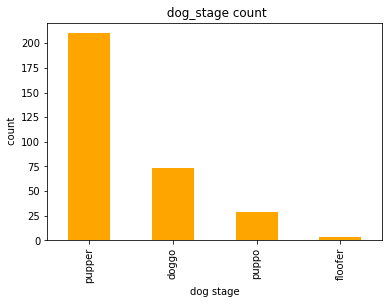

In [178]:
#visualizing count of dog stages
twitter_archive_master.dog_stage.value_counts().plot(kind='bar',color='orange')
plt.ylabel(' count')
plt.xlabel('dog stage')
plt.title(' dog_stage count');

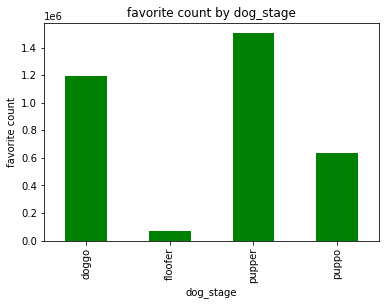

In [171]:
#visualizing dog stages by likes/favorites
twitter_archive_master.groupby(['dog_stage']).sum()['favorite_count'].plot(kind='bar',color='g')
plt.ylabel('favorite count')
plt.title('favorite count by dog_stage');

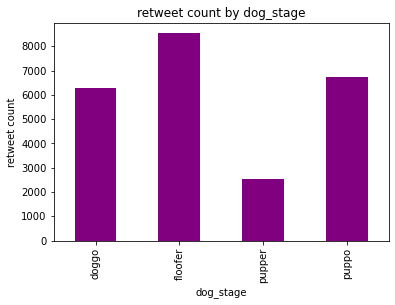

In [168]:
#visualizing  dog stages by retweets counts
twitter_archive_master.groupby(['dog_stage']).mean()['retweet_count'].plot(kind='bar',color='purple')
plt.ylabel('retweet count')
plt.title('retweet count by dog_stage');